### 16장 이미지 인식의 꽃, CNN 익히기

#### 4. 컨볼루션 신경망(CNN)
- 컨볼루션 신경망: 입력된 이미지에서 다시 한 번 특징을 추출하기 위해 커널을 도입하는 기법
    - 컨볼루션(합성곱): 입력 데이터로부터 더욱 정교한 특징 추출 가능
    - ```Conv2D()```: 컨볼루션 층 추가
    
- ```modle.add)Conv2D(32, kernel_size(3,3), input_shape(28, 28, 1), activation='relu'))```
    > **1** | 첫번째 인자: 커널을 몇 개 적용할지 결정  
    > **2** | kernel_size: 커널의 크기 결정. ```kernel_size=(행, 열)``` 형식   
    > **3** | input_shape: 처음 층에 입력되는 값 알려주기. ```input_shape(행, 열, 색상 또는 흑백)``` 형식  
    > **4** | activation: 활성화 함수 정의
- ```model.add(Conv2D(64, (3, 3), activation='relu'))```
- 도식화  

    <img src="https://thebook.io/img/080228/231.jpg" width="350" align="left">

#  
#  
#  
#  
#  
#  
#  
<br>
<br>
<br>

#### 5. 맥스 풀링
- 풀링(pooling) / 서브 샘플링(sub sampling): 이미지 특징이 크고 복잡할 경우 축소하는 과정
    - **맥스 풀링(max pooling)**: 정해진 구역 안에서 최댓값을 뽑아냄
        - MaxPooling2D() 함수 사용
            - ```model.add(MaxPooling2D(pool_size=2))```
                - pool_size: 풀링 창의 크기 설정
    - **평균 풀링(average pooling)**: 평균값을 뽑음
- 도식화

    <img src="https://thebook.io/img/080228/233.jpg" width="350" align="left">

#  
#  
#  
#  
#  
#  
#  
<br>
<br>
<br>
<br>

#### 드롭아웃, 플래튼
- **드롭아웃(drop out)**: 과적합을 피하는 기법
    - 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것
    - ```model.add(Dropout(0.25)``` : 25%의 노드를 끈다는 뜻
    - 랜덤하게 노드를 끔으로써 과적합 방지 가능
    
    <img src="https://thebook.io/img/080228/234.jpg" width="500" align="left">
    
#  
#  
#  
#  
<br>
<br>
<br>

- **플래튼(Flatten)**
    - 맥스 풀링은 2차원 배열인 채로 이미지를 다룸 → 1차원 배열로 전환 필요(활성화 함수 사용을 위해)
    - ```model.add(Flatten())```

<br>

- 도식화

    <img src="https://thebook.io/img/080228/235.jpg" width="600" align="left">

#### 6. 컨볼루션 신경망 실행하기

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [4]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [5]:
# 모델 최적화 설정
MODEL_DIR = './model_deep/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model_deep/{epoch:02d}-{val_loss:4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [6]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])

# 테스트 정화도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.05556, saving model to ./model_deep/01-0.055562.hdf5

Epoch 00002: val_loss improved from 0.05556 to 0.03983, saving model to ./model_deep/02-0.039827.hdf5

Epoch 00003: val_loss improved from 0.03983 to 0.03340, saving model to ./model_deep/03-0.033404.hdf5

Epoch 00004: val_loss did not improve from 0.03340

Epoch 00005: val_loss improved from 0.03340 to 0.03150, saving model to ./model_deep/05-0.031496.hdf5

Epoch 00006: val_loss improved from 0.03150 to 0.02897, saving model to ./model_deep/06-0.028973.hdf5

Epoch 00007: val_loss did not improve from 0.02897

Epoch 00008: val_loss did not improve from 0.02897

Epoch 00009: val_loss improved from 0.02897 to 0.02896, saving model to ./model_deep/09-0.028962.hdf5

Epoch 00010: val_loss did not improve from 0.02896

Epoch 00011: val_loss did not improve from 0.02896

Epoch 00012: val_loss improved from 0.02896 to 0.02710, saving model to ./model_deep/12-0.027103.hdf5

Epoch 00013: val_loss 

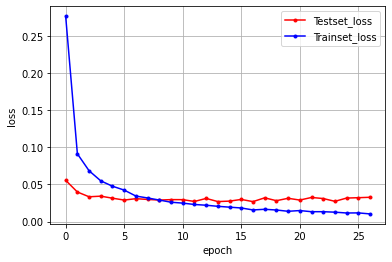

In [9]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()